# Semi Supervised Learning with SVMs,   changes in decision boundaries

This example again looks a semi-supervised learning using an SVM and the Iris data

Several different aproaches to semi-supervised learning will be used at different unlabeled data fractions,   including label spreading as well as self training

Question:   The Iris data set is pretty easy to classify,  neural net models reach over 98 or 99% correct.   Does that make this a good example data set?


Source

https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_semi_supervised_versus_svm_iris.html#sphx-glr-auto-examples-semi-supervised-plot-semi-supervised-versus-svm-iris-py

# Imports

In [1]:
# Authors: Clay Woolam   <clay@woolam.org>
#          Oliver Rausch <rauscho@ethz.ch>
# License: BSD

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading, SelfTrainingClassifier
from sklearn.svm import SVC


# Data setup

In [2]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

# step size in the mesh, used in plotting boundaries
h = 0.02

# Setup several data sets with varying levels of unlabeled data

Note the use of LabelSpreading

LabelSpreading estimates regions of label values, based on a similiarity matrix (ie a distance) between data points and "spreads" labels from nearby specimens to unlabeled specimens.

This is somewhat akin to an interpolation or "kriging" method, but in a fairly high dimensionality vector space

In [4]:
# set the state of the random number generator so results are reproducible

rng = np.random.RandomState(0)

# generate some random values, to use to determine which labels are set to -1
# which means unlabeled in the semi-supervised process

y_rand = rng.rand(y.shape[0])
y_30 = np.copy(y)

# y30 is the set with 30% unlabled,  chosen based on the thresholds

y_30[y_rand < 0.3] = -1  # set random samples to be unlabeled

# y50 is the set with 50% unlabeled

y_50 = np.copy(y)
y_50[y_rand < 0.5] = -1




**Set up the labelSpreading classifiers**

In [6]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (LabelSpreading().fit(X, y_30), y_30, "Label Spreading 30% data")
ls50 = (LabelSpreading().fit(X, y_50), y_50, "Label Spreading 50% data")
ls100 = (LabelSpreading().fit(X, y), y, "Label Spreading 100% data")

# Set up the base classifier and the Selftraining classifiers

In [5]:

# the base classifier for self-training is identical to the SVC
base_classifier = SVC(kernel="rbf", gamma=0.5, probability=True)
st30 = (
    SelfTrainingClassifier(base_classifier).fit(X, y_30),
    y_30,
    "Self-training 30% data",
)
st50 = (
    SelfTrainingClassifier(base_classifier).fit(X, y_50),
    y_50,
    "Self-training 50% data",
)

rbf_svc = (SVC(kernel="rbf", gamma=0.5).fit(X, y), y, "SVC with rbf kernel")

# Set up the variables for the Mesh Plot

In [8]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

color_map = {-1: (1, 1, 1), 0: (0, 0, 0.9), 1: (1, 0, 0), 2: (0.8, 0.6, 0)}

# Iterate through the 6 classifiers and plot the decision boundaries in use

The white data points are the initial unlabeled specimens

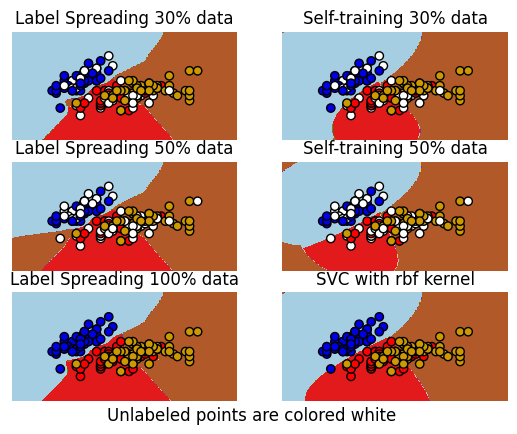

In [9]:
classifiers = (ls30, st30, ls50, st50, ls100, rbf_svc)
for i, (clf, y_train, title) in enumerate(classifiers):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(3, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("off")

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors="black")

    plt.title(title)

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

# Action: Resubstitution Rates

Find the resubsitution classification accuracies for each of these six models